In [36]:
# Step 1: Import library yang diperlukan
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik
from sklearn.model_selection import train_test_split  # Untuk membagi dataset
from sklearn.preprocessing import StandardScaler  # Untuk normalisasi data
from sklearn.linear_model import LogisticRegression  # Model Logistic Regression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # Untuk evaluasi model
from sklearn.impute import SimpleImputer  # Untuk menggantikan nilai yang hilang
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi data yang lebih baik

# Kesimpulan:
# Pada langkah ini, mengimpor semua library yang diperlukan untuk proses analisis dan pemodelan data.


In [37]:
# Step 2: Membaca dataset dari file CSV
df = pd.read_csv('/content/CitarumWater.csv')  # Membaca data dari file CSV

# Menampilkan 5 data teratas untuk memahami struktur data
print(df.head())

# Kesimpulan:
# Pada langkah ini, membaca dataset dari file CSV dan menampilkan 5 baris pertama untuk memahami struktur dan isi data.


   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  


In [38]:
# Step 3: Hapus simbol '°C' di kolom 'Temp' dan ubah tipe data menjadi float
df['Temp'] = df['Temp'].str.replace('°C', '').astype(float)  # Menghapus simbol dan mengubah tipe data

# Mengganti nilai '-' di kolom O2 dengan NaN
df['O2'] = pd.to_numeric(df['O2'], errors='coerce')  # Mengubah kolom 'O2' menjadi numerik

# Kesimpulan:
# Pada langkah ini, melakukan preprocessing pada kolom 'Temp' dan 'O2' untuk memastikan semua nilai dapat digunakan dalam model.


In [39]:
# Step 4: Menghapus kolom non-numerik yang tidak relevan
df.drop(columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu'], inplace=True)  # Menghapus kolom yang tidak diperlukan

# Kesimpulan:
# Pada langkah ini, menghapus kolom-kolom yang tidak relevan untuk analisis, sehingga hanya kolom numerik yang tersisa.


In [40]:
# Step 5: Memisahkan fitur dan target
X = df.drop(columns=['Class'])  # Fitur (selain kolom 'Class')
y = df['Class']  # Target (kolom 'Class')

# Kesimpulan:
# Pada langkah ini, memisahkan data menjadi fitur (X) dan target (y) untuk model klasifikasi.


In [41]:
# Step 6: Menggunakan SimpleImputer untuk menggantikan NaN dengan median dari masing-masing kolom
imputer = SimpleImputer(strategy='median')  # Inisialisasi SimpleImputer dengan strategi median
X_imputed = imputer.fit_transform(X)  # Mengganti NaN dengan median

# Kesimpulan:
# Pada langkah ini, menggunakan SimpleImputer untuk mengganti nilai yang hilang dengan median dari masing-masing kolom,
# sehingga data siap untuk pelatihan model.


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['O2']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [42]:
# Step 7: Memisahkan data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)  # Membagi data

# Kesimpulan:
# Pada langkah ini, membagi dataset menjadi data pelatihan dan pengujian untuk evaluasi model.


In [43]:
# Step 8: Normalisasi data fitur menggunakan StandardScaler
scaler = StandardScaler()  # Inisialisasi StandardScaler
X_train_scaled = scaler.fit_transform(X_train)  # Normalisasi data pelatihan
X_test_scaled = scaler.transform(X_test)  # Normalisasi data pengujian

# Kesimpulan:
# Pada langkah ini, melakukan normalisasi data menggunakan StandardScaler agar semua fitur berada dalam skala yang sama,
# yang penting untuk model Logistic Regression.


In [44]:
# Step 9: Inisialisasi model Logistic Regression
model = LogisticRegression(max_iter=1000)  # Inisialisasi model dengan iterasi maksimum

# Melatih model dengan data training
model.fit(X_train_scaled, y_train)  # Melatih model dengan data pelatihan

# Kesimpulan:
# Pada langkah ini, inisialisasi model Logistic Regression dan melatihnya dengan data pelatihan.


LogisticRegression(max_iter=1000)

In [45]:
# Step 10: Prediksi pada data uji
y_pred = model.predict(X_test_scaled)  # Membuat prediksi pada data pengujian

# Evaluasi model
print("Classification Report:")
print(classification_report(y_test, y_pred))  # Menampilkan laporan klasifikasi

print("Accuracy Score:", accuracy_score(y_test, y_pred))  # Menampilkan akurasi model

# Kesimpulan:
# Pada langkah ini, melakukan prediksi pada data pengujian dan mengevaluasi model menggunakan laporan klasifikasi dan akurasi.


Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95       196
           2       0.96      0.97      0.96       294
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00         4

    accuracy                           0.96       500
   macro avg       0.98      0.94      0.96       500
weighted avg       0.96      0.96      0.96       500

Accuracy Score: 0.958


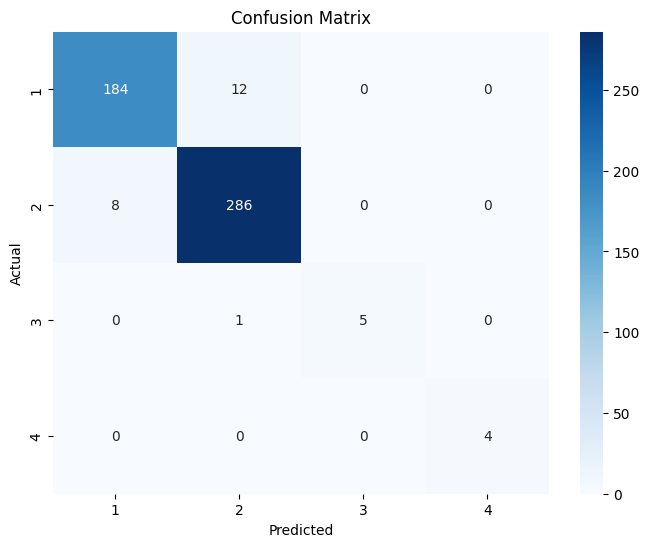

In [46]:
# Step 11: Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)  # Menghitung confusion matrix
plt.figure(figsize=(8, 6))  # Menentukan ukuran grafik
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))  # Visualisasi confusion matrix
plt.xlabel("Predicted")  # Label sumbu x
plt.ylabel("Actual")  # Label sumbu y
plt.title("Confusion Matrix")  # Judul grafik
plt.show()  # Menampilkan grafik

# Kesimpulan:
# Pada langkah ini, membuat dan memvisualisasikan confusion matrix untuk menganalisis hasil prediksi model.
